
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [2]:
student_number = '400101689'
first_name = 'Zahra'
last_name = 'GhayourHallaj'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [3]:
# TODO: Write your code here
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [5]:
# TODO: Write your code here
spotify_df = pd.read_csv('spotify.csv')

# Display the first few rows of the dataset
spotify_df.head()

# Display the first few rows of the new DataFrame
spotify_df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)


Standardization (scaling) is an essential step in data preprocessing, especially for clustering algorithms like K-means. The importance of using a standard scaler lies in the following reasons:

1. Feature Scaling: Clustering algorithms often use distance measures (e.g., Euclidean distance) to determine the similarity between data points. If the features are on different scales, the algorithm might be biased towards features with larger scales. Standardization ensures that all features contribute equally to the distance metric.
2. Improving Convergence: For algorithms like K-means, standardization can help the algorithm converge faster. Non-standardized data can lead to poor convergence or even failure to converge.
3. Interpretability: Standardized data makes the interpretation of results more straightforward, as the features are on a comparable scale.

Without standardization, clustering results might be dominated by features with larger numeric ranges, leading to misleading clusters.

In [6]:
# TODO: Write your code here
# Implementing a standard scaler from scratch
class StandardScalerFromScratch:
    def __init__(self):
        self.means = None
        self.stds = None

    def fit(self, data):
        """Compute the mean and standard deviation for each feature in the data."""
        self.means = data.mean(axis=0)
        self.stds = data.std(axis=0)

    def transform(self, data):
        """Standardize the data by subtracting the mean and dividing by the standard deviation."""
        standardized_data = (data - self.means) / self.stds
        return standardized_data

    def fit_transform(self, data):
        """Fit to the data, then transform it."""
        self.fit(data)
        return self.transform(data)
# Extracting numerical columns for standardization
num_cols = spotify_df.select_dtypes(include=['float64', 'int64']).columns
num_spotify_df = spotify_df[num_cols]

# Instantiating the custom scaler and applying it to the numerical data
custom_scaler = StandardScalerFromScratch()
scaled_data = custom_scaler.fit_transform(num_spotify_df)

# Converting the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)

# Displaying the first few rows of the standardized DataFrame
scaled_df.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.941517,0.642039,1.201596,0.173197,1.367103,0.876164,-0.481355,-0.333893,-0.377947,-0.809217,0.031907,0.042926,-0.518866
1,0.981542,0.490404,0.643307,1.557603,0.585758,0.876164,-0.688631,-0.468663,-0.359172,1.081044,0.782510,-0.777186,-1.056252
2,1.101619,0.138887,1.284510,-1.211209,1.100073,-1.141305,-0.324417,-0.436792,-0.377843,-0.519554,0.439377,0.116225,-0.822004
3,0.701364,0.435264,1.278982,0.450078,0.984294,0.876164,-0.050023,-0.667632,-0.377905,0.089580,-1.001780,0.039953,-0.947735
4,1.061593,-0.033425,0.742804,-1.211209,0.685141,0.876164,-0.702450,-0.432694,-0.377947,-0.692574,0.919763,0.115035,-0.614163


# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

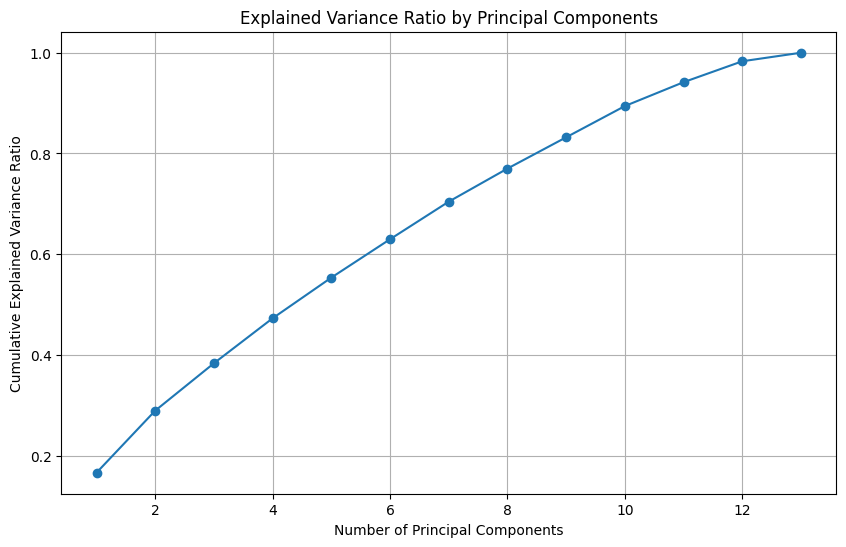

Number of components to retain to have 95% variance: 12


In [ ]:
# Apply PCA
pca = PCA()
pca.fit(scaled_df)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

# Determine the number of components to retain based on a threshold (e.g., 95% variance)
threshold = 0.95
num_components = next(i for i, total in enumerate(cumulative_variance_ratio) if total >= threshold) + 1

print(f'Number of components to retain to have 95% variance: {num_components}')

# Clustering

Implement K-means for clustering from scratch.

In [8]:
class KMeansFromScratch:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        # Randomly initialize the centroids
        np.random.seed(42)
        initial_centroids_idx = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[initial_centroids_idx]

        for i in range(self.max_iter):
            # Assign clusters
            self.labels = self._assign_clusters(X)

            # Compute new centroids
            new_centroids = self._compute_centroids(X)

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) <= self.tol):
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k] = X[self.labels == k].mean(axis=0)
        return centroids

    def predict(self, X):
        return self._assign_clusters(X)

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

Step 1: Reduce the Data using PCA

In [ ]:
# Apply PCA to reduce to two principal components for plotting
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_df)

# Convert to DataFrame for easier handling
reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])

Step 2: Implement K-means and Plot Clusters

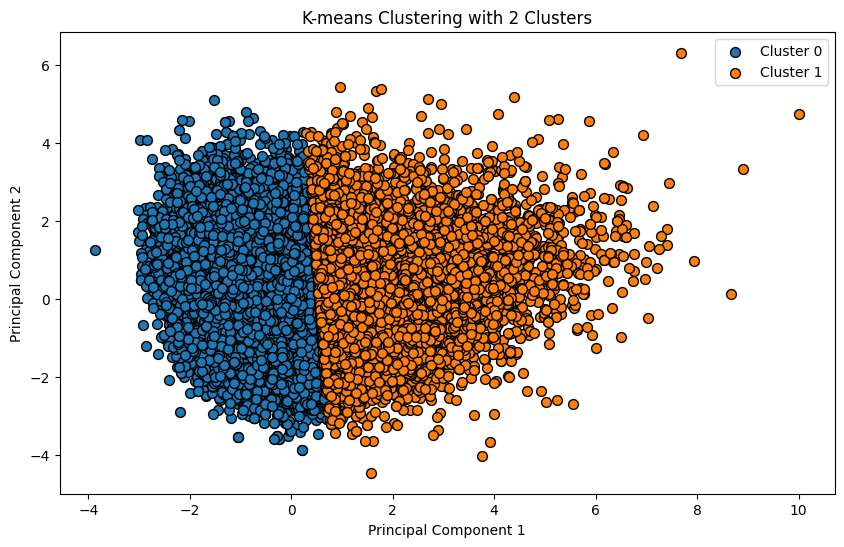

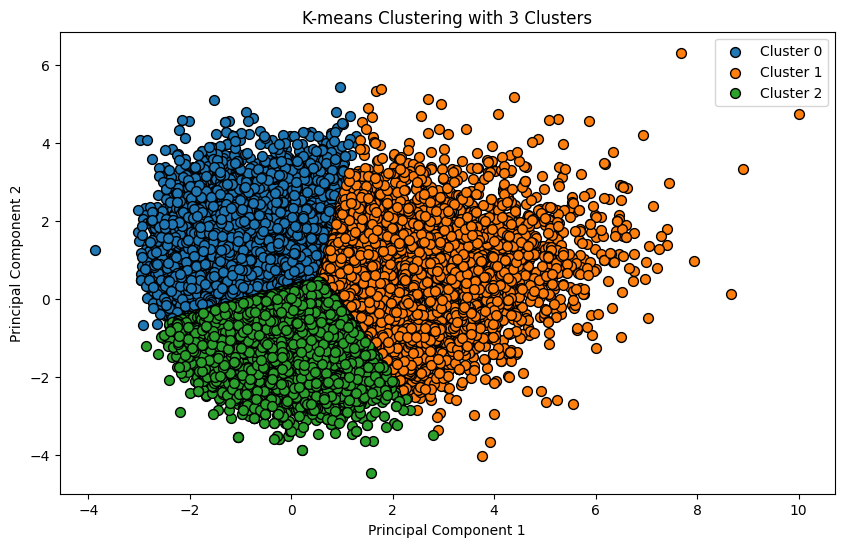

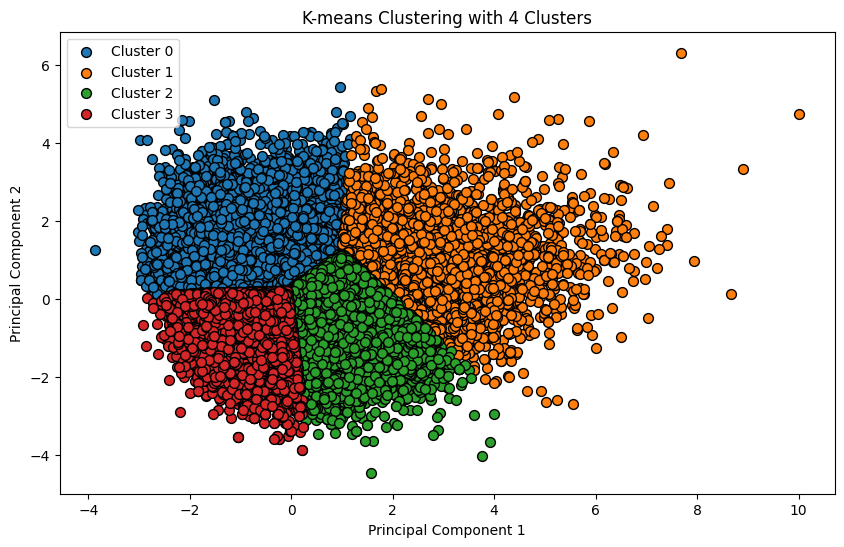

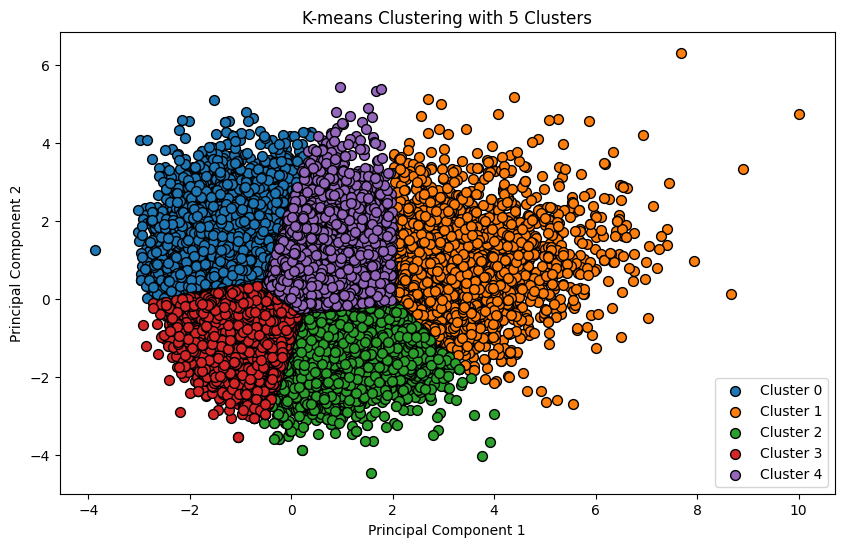

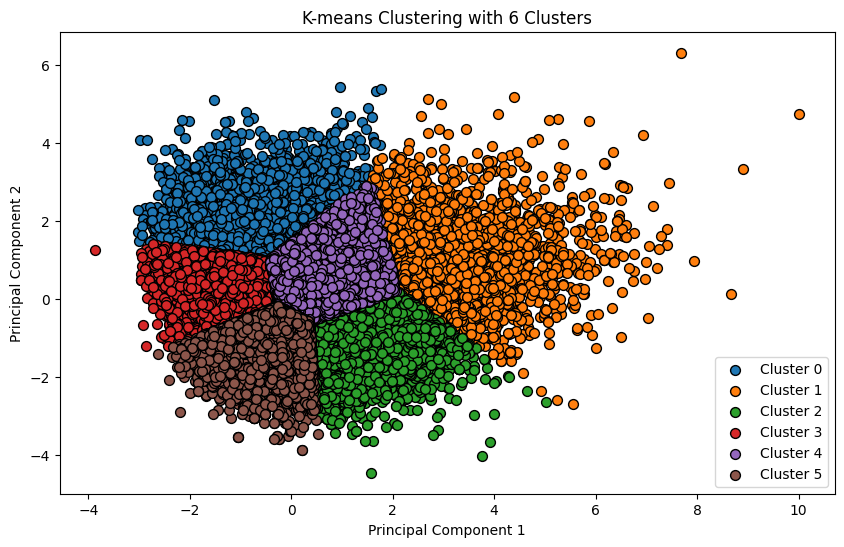

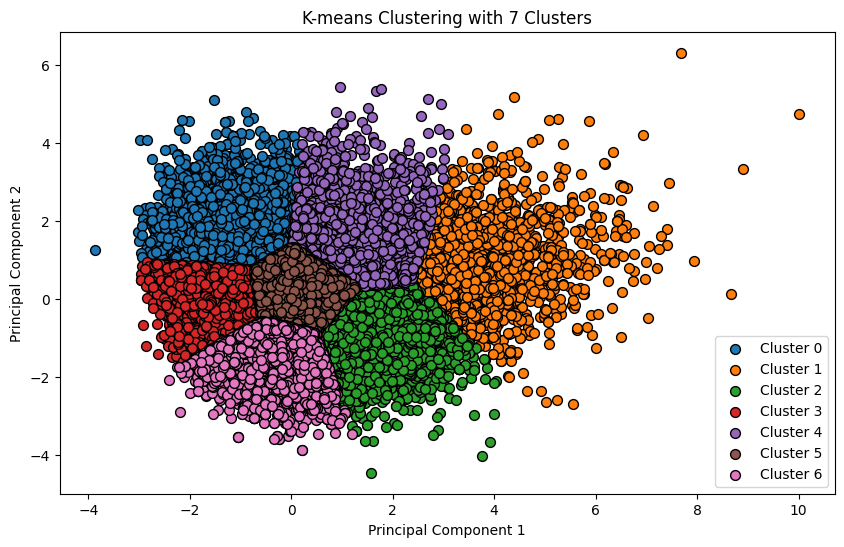

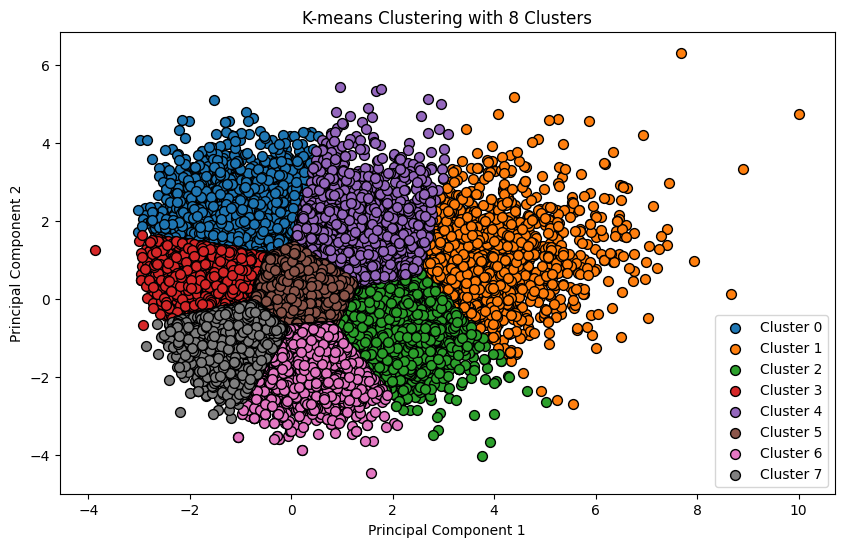

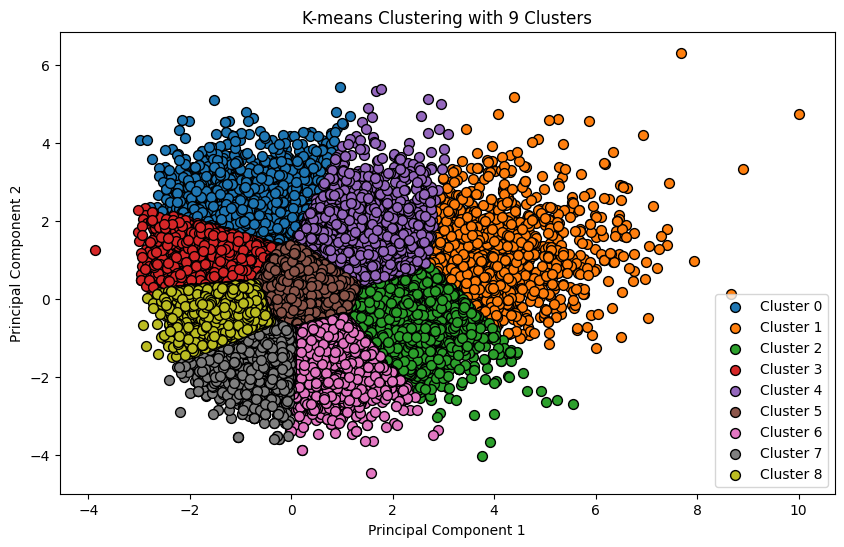

In [ ]:
# Function to run K-means and plot clusters in scatter form
def run_kmeans_and_plot(n_clusters, reduced_df):
    # Apply K-means clustering
    kmeans = KMeansFromScratch(n_clusters)
    kmeans.fit(reduced_df.values)
    labels = kmeans.predict(reduced_df.values)

    # Add cluster labels to the DataFrame
    reduced_df['Cluster'] = labels

    # Plot clusters using the first two principal components
    plt.figure(figsize=(10, 6))
    for cluster in range(n_clusters):
        cluster_data = reduced_df[reduced_df['Cluster'] == cluster]
        plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', marker='o', edgecolor='k', s=50)

    plt.title(f'K-means Clustering with {n_clusters} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Run K-means for clusters ranging from 2 to 9 and plot the results
for n_clusters in range(2, 10):
    run_kmeans_and_plot(n_clusters, reduced_df.copy())

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

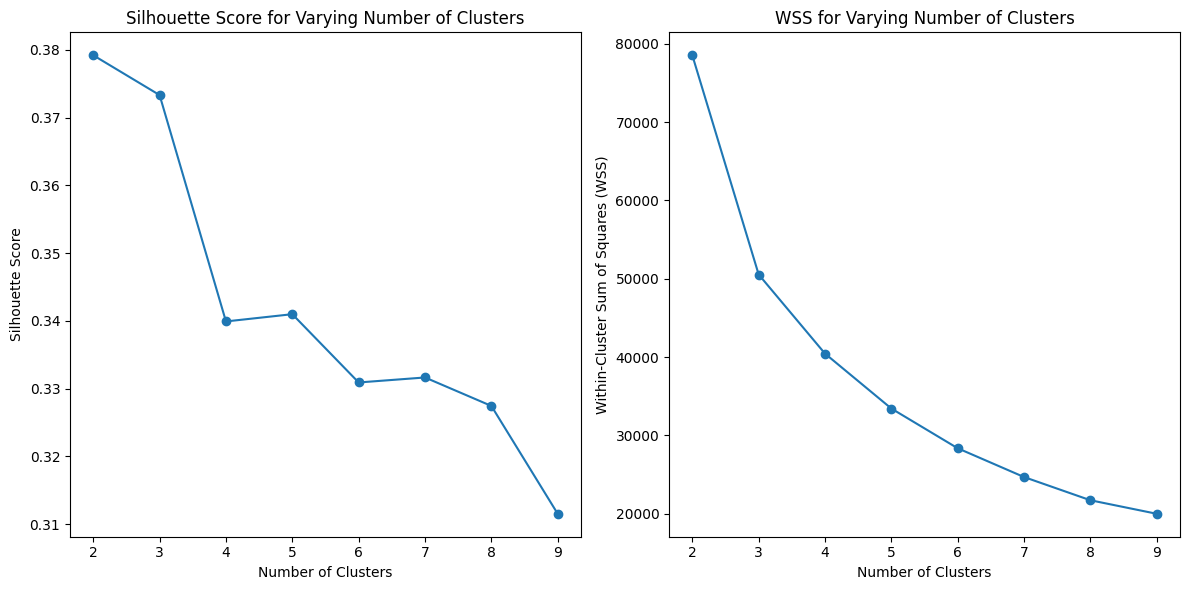

In [ ]:
# TODO: Write your code here
# Function to calculate WSS
from sklearn.metrics import silhouette_score
def calculate_wss(X, labels, centroids):
    wss = 0
    for k in range(len(centroids)):
        cluster_points = X[labels == k]
        wss += np.sum((cluster_points - centroids[k]) ** 2)
    return wss

# Initialize lists to store the scores
silhouette_scores = []
wss_scores = []

# Define the range of clusters to test
cluster_range = range(2, 10)

# Loop over the cluster range
for n_clusters in cluster_range:
    kmeans = KMeansFromScratch(n_clusters)
    kmeans.fit(reduced_df.values)
    labels = kmeans.predict(reduced_df.values)

    # Calculate Silhouette score
    silhouette_avg = silhouette_score(reduced_df.values, labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate WSS
    wss = calculate_wss(reduced_df.values, labels, kmeans.centroids)
    wss_scores.append(wss)

# Plot Silhouette score
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Varying Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plot WSS score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, wss_scores, marker='o')
plt.title('WSS for Varying Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')

plt.tight_layout()
plt.show()

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [9]:
# Define the number of clusters
n_clusters = 4  # For example, choose 4 clusters

# Apply K-means clustering
kmeans = KMeansFromScratch(n_clusters)
kmeans.fit(scaled_df.values)

# Get the cluster labels
labels = kmeans.predict(scaled_df.values)

# Add cluster labels to the DataFrame
scaled_df['Cluster'] = labels

# Function to calculate the Euclidean distance
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

# Function to randomly select two songs from each cluster and calculate the distance
def sample_check(df, clusters):
    distances = []
    for cluster in range(clusters):
        cluster_data = df[df['Cluster'] == cluster]
        if len(cluster_data) < 2:
            continue
        random_samples = cluster_data.sample(n=2, random_state=42)
        dist = euclidean_distance(random_samples.iloc[0, :-1].values, random_samples.iloc[1, :-1].values)
        distances.append((cluster, dist, random_samples.iloc[0].name, random_samples.iloc[1].name))
    return distances

# Get the distances between two randomly selected songs from each cluster
distances = sample_check(scaled_df, n_clusters)

# Display the results
for cluster, dist, idx1, idx2 in distances:
    print(f"Cluster {cluster}: Distance between songs {idx1} and {idx2} is {dist:.4f}")


Cluster 0: Distance between songs 19255 and 10257 is 3.2850
Cluster 1: Distance between songs 27042 and 13901 is 6.7431
Cluster 2: Distance between songs 4275 and 17397 is 3.3870
Cluster 3: Distance between songs 5611 and 14358 is 6.0374


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

Cluster 0: Distance between selected songs: 6.0374
Cluster 1: Distance between selected songs: 6.7431
Cluster 2: Distance between selected songs: 3.2850
Cluster 3: Distance between selected songs: 3.3870


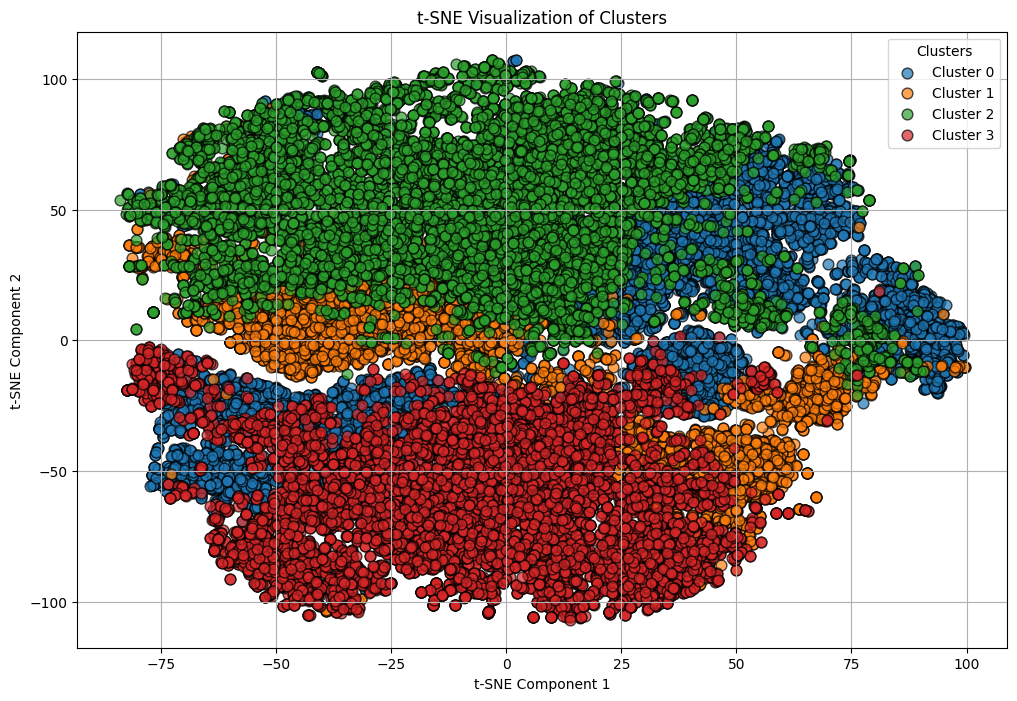

In [10]:
from sklearn.manifold import TSNE
# Define the number of clusters
n_clusters = 4  # For example, choose 4 clusters

# Apply K-means clustering
kmeans = KMeansFromScratch(n_clusters=n_clusters)
kmeans.fit(scaled_df.values)
labels = kmeans.predict(scaled_df.values)

# Add cluster labels to the original data
scaled_df['Cluster'] = labels

# Function to calculate the Euclidean distance
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

# Randomly select two songs from each cluster and calculate the distance
def random_sample_distance(data, labels, cluster):
    cluster_data = data[labels == cluster]
    if len(cluster_data) < 2:
        return None, None, None
    sample = cluster_data.sample(2, random_state=42)
    song1, song2 = sample.iloc[0], sample.iloc[1]
    distance = euclidean_distance(song1, song2)
    return song1, song2, distance

# Calculate distances for each cluster
distances = {}
for cluster in range(n_clusters):
    song1, song2, distance = random_sample_distance(pd.DataFrame(scaled_df.drop('Cluster', axis=1)), labels, cluster)
    if song1 is not None and song2 is not None:
        distances[cluster] = distance
        print(f"Cluster {cluster}: Distance between selected songs: {distance:.4f}")

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_df.drop('Cluster', axis=1).values)

# Convert t-SNE result to DataFrame for easier plotting
tsne_df = pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = labels

# Plot the t-SNE results
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
    plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], label=f'Cluster {cluster}', alpha=0.7, edgecolors='k', s=60)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.legend(title='Clusters')
plt.grid(True)
plt.show()
